<a href="https://colab.research.google.com/github/sabriades/Machine_Learning_Model/blob/main/RF_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import pickle
import pandas as pd
import numpy as np
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import files
uploaded=files.upload()

Saving NANOCOMPOSITES_DATASET_HERE.csv to NANOCOMPOSITES_DATASET_HERE.csv


In [8]:
nanocomposites=pd.read_csv('NANOCOMPOSITES_DATASET_HERE.csv')
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Filler Geometry,Elastic Modulus matrix (MPa),Paper
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,Graphene nanoplatelets (GNP),3554.7,26
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,Graphene nanoplatelets (GNP),3554.7,26
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,multi-walled carbon nanotubes (MWCNT),3554.7,26


In [9]:
nanocomposites=nanocomposites.drop(['Paper','Filler Geometry'], axis=1)

In [14]:
nanocomposites.shape

(115, 7)

In [15]:
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,3554.7
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,3554.7
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,3554.7


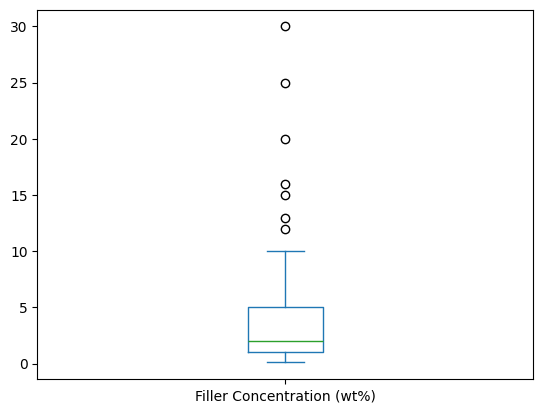

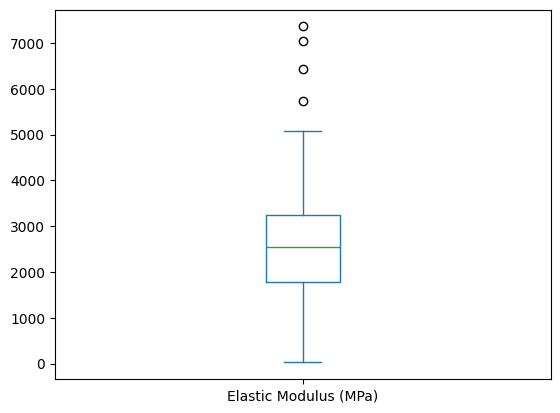

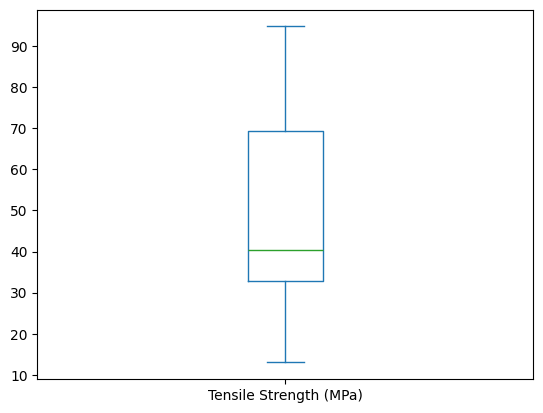

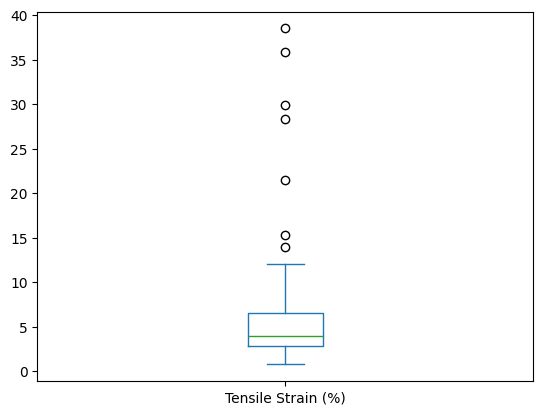

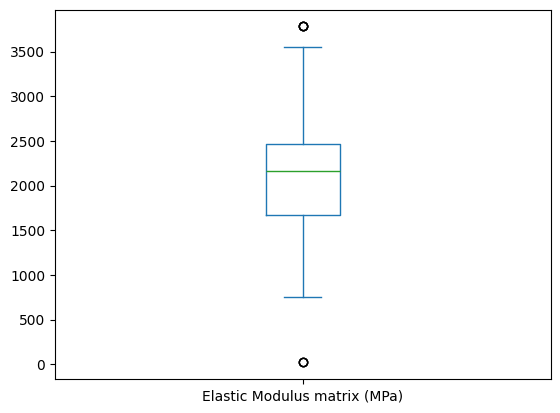

In [16]:
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    nanocomposites[[colonna]].plot(kind='box')

In [17]:
outliers_dict={}
outliers_idx=[]
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    Q1=nanocomposites[colonna].quantile(0.25)
    Q3=nanocomposites[colonna].quantile(0.75)
    IQR=Q3-Q1
    limite_basso=Q1-1.5*IQR
    limite_alto=Q3+1.5*IQR
    outliers_all=nanocomposites[(nanocomposites[colonna]<limite_basso) | (nanocomposites[colonna]>limite_alto)]
    outliers_index=nanocomposites[(nanocomposites[colonna]<limite_basso) | (nanocomposites[colonna]>limite_alto)].index
    outliers_idx.append(outliers_index)
    outliers_dict[colonna]=outliers_all

In [18]:
outliers_idx #indici di tutti gli outlier. anche se sono pochi ora li contiamo

[Index([18, 19, 81, 107, 108, 109, 110], dtype='int64'),
 Index([15, 16, 109, 110], dtype='int64'),
 Index([], dtype='int64'),
 Index([44, 45, 46, 47, 48, 49, 76], dtype='int64'),
 Index([40, 41, 42, 43, 50, 51, 52], dtype='int64')]

In [19]:
total_outliers=sum(len(sotto_gruppo) for sotto_gruppo in outliers_idx)
print(total_outliers)

25


In [20]:
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler', 'Tensile Strength (MPa)']:
    print("outliers di: "+colonna)
    display(outliers_dict[colonna])

outliers di: Filler Concentration (wt%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
18,Epoxy,Nanosilica,13.0,3330.0,85.25,3.62,2750.0
19,Epoxy,Nanosilica,25.0,3800.0,88.11,3.52,2750.0
81,ABS,MWCNT,15.0,2917.3,22.00,1.80,2159.8
107,ABS,GNP,12.0,4450.0,42.40,2.50,2315.0
108,ABS,GNP,16.0,5072.0,41.60,2.00,2315.0
109,ABS,GNP,20.0,5725.0,42.90,1.90,2315.0
110,ABS,GNP,30.0,7362.0,44.30,1.30,2315.0


outliers di: Elastic Modulus (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
15,ABS,SWCNT,7.5,6434.0,40.5,2.6,2278.0
16,ABS,SWCNT,10.0,7045.0,40.3,1.8,2278.0
109,ABS,GNP,20.0,5725.0,42.9,1.9,2315.0
110,ABS,GNP,30.0,7362.0,44.3,1.3,2315.0


outliers di: Tensile Strain (%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
44,PET,TiO₂,1.0,2486.1,28.30,21.50,2467.2
45,PET,TiO₂,3.0,2561.3,30.70,28.30,2467.2
46,PET,TiO₂,5.0,2572.8,36.90,15.30,2467.2
47,PLA,TiO₂,1.0,1710.0,26.33,29.86,1840.0
48,PLA,TiO₂,3.0,1780.0,25.14,38.50,1840.0
49,PLA,TiO₂,5.0,1660.0,23.47,35.82,1840.0
76,ABS,MWCNT,1.0,2169.1,26.90,14.00,2159.8


outliers di: Elastic Modulus matrix (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
40,Epoxy,MWCNT,0.1,2823.00,42.24,1.40,3782.00
41,Epoxy,MWCNT,0.2,3345.00,62.56,1.96,3782.00
42,Epoxy,MWCNT,0.3,3680.00,63.04,2.52,3782.00
43,Epoxy,MWCNT,0.4,3684.00,28.00,0.76,3782.00
50,PET,Clay,1.0,23.93,45.00,2.07,19.59
51,PET,Clay,3.0,28.14,51.79,2.01,19.59
52,PET,Clay,5.0,25.89,41.55,1.73,19.59


In [21]:
list_idx_outliers_all=[indice for sotto_lista in outliers_idx for indice in sotto_lista]
print(list_idx_outliers_all)

[18, 19, 81, 107, 108, 109, 110, 15, 16, 109, 110, 44, 45, 46, 47, 48, 49, 76, 40, 41, 42, 43, 50, 51, 52]


In [22]:
len(list_idx_outliers_all)

25

In [23]:
len(nanocomposites)

115

In [24]:
nanocomposites_clean_out_all=nanocomposites.drop(list_idx_outliers_all)
nanocomposites_clean_out_all.shape

(92, 7)

In [25]:
for i in range(len(list_idx_outliers_all)):
  for j in range(i+1,len(list_idx_outliers_all)):
     if list_idx_outliers_all[i]==list_idx_outliers_all[j]:
      print('si ripetono gli outlier con indici: '+str(list_idx_outliers_all[i]))

si ripetono gli outlier con indici: 109
si ripetono gli outlier con indici: 110


In [26]:
nanocomposites_clean_encoded=pd.get_dummies(nanocomposites_clean_out_all)
nanocomposites_clean_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PMMA,Filler_Clay,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,True,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,True,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,False,False,True,False,False,False,False,False


In [27]:
nanocomposites_clean_encoded.shape

(92, 18)

In [28]:
nanocomposites_clean_encoded.columns

Index(['Filler Concentration (wt%)', 'Elastic Modulus (MPa)',
       'Tensile Strength (MPa)', 'Tensile Strain (%)',
       'Elastic Modulus matrix (MPa)', 'Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PMMA', 'Filler_Clay',
       'Filler_GNP', 'Filler_GNS', 'Filler_GO', 'Filler_MWCNT',
       'Filler_Nanosilica', 'Filler_SWCNT', 'Filler_Silica', 'Filler_h-BN',
       'Filler_rGO'],
      dtype='object')

In [29]:
X=nanocomposites_clean_encoded[['Filler Concentration (wt%)', 'Elastic Modulus matrix (MPa)','Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS', 'Filler_GO',
       'Filler_MWCNT','Filler_Nanosilica', 'Filler_SWCNT', 'Filler_Silica', 'Filler_h-BN', 'Filler_rGO']]
y=nanocomposites_clean_encoded[['Elastic Modulus (MPa)','Tensile Strength (MPa)', 'Tensile Strain (%)']]

In [ ]:
X.head(3)

,Filler Concentration (wt%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PMMA,Filler_Clay,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_h-BN,Filler_rGO
0,0.2,3554.7,False,True,False,False,True,False,False,False,False,False,False,False,False
1,0.4,3554.7,False,True,False,False,True,False,False,False,False,False,False,False,False
2,0.2,3554.7,False,True,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
y.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
0,3722.4,74.2,4.4
1,3407.2,71.1,6.2
2,3654.5,72.4,6.9


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#20% nel testing set - ho visto un peggioramento di oob_score_=75%
#metto 10% - migliora leggermente 76%, ma non è comunque come prima. stavamo a 78%
#metto 5% - nulla, peggiora leggermente, sotto i 76.16%
#rimetto 10% e aumento la quantità di alberi a 1000. migliora leggermente, sui 76.20%, ma non abbastanza. aumentando a 1500 alberi diminuisce
#provo 600 - aumento fino a 76.36%
#provo 700 e diminuisce a 76.33%. mi fermo a 600

In [31]:
len(y_train)

73

In [32]:
len(y_test)

19

In [33]:
model=RandomForestRegressor(n_estimators=500,max_features='sqrt', random_state=42, oob_score=True)

In [34]:
rf=model.fit(X_train,y_train)

In [35]:
rf.oob_score_ #peggiorato, 75%
#provo a diminuire la quantità dei dati nel testing set

0.7524788218321371

In [36]:
pred_properties_clean=rf.predict(X_test)

In [37]:
mae=mean_absolute_error(y_true=y_test, y_pred=pred_properties_clean)
print('MAE: '+str(mae))

MAE: 73.76138063551595


In [38]:
mse=mean_squared_error(y_true=y_test, y_pred=pred_properties_clean)
rmse=math.sqrt(mse)
print('RMSE: '+str(rmse))

RMSE: 187.3687313941908


In [39]:
r2=rf.score(X_test, y_test)
print('R2:'+str(r2)) #peggiorato tantissimo

R2:0.6043201444621858


In [40]:
pred_properties_clean_df=pd.DataFrame(pred_properties_clean, columns=y_test.columns, index=y_test.index)

In [41]:
for colonna in pred_properties_clean_df:
  mae_each_target=mean_absolute_error(y_true=y_test[colonna], y_pred=pred_properties_clean_df[colonna])
  mse_each_target=mean_squared_error(y_true=y_test[colonna], y_pred=pred_properties_clean_df[colonna])
  rmse_each_target=math.sqrt(mse_each_target)
  r2_each_target=r2_score(y_true=y_test[colonna], y_pred=pred_properties_clean_df[colonna])
  print('Colonna: '+colonna)
  print('MAE di '+colonna+' : '+str(mae_each_target))
  print('RMSE di '+colonna+' : '+str(rmse_each_target))
  print('R2 di '+colonna+' : '+str(r2_each_target))  #peggioramento generale

Colonna: Elastic Modulus (MPa)
MAE di Elastic Modulus (MPa) : 213.53566766081994
RMSE di Elastic Modulus (MPa) : 324.3877094956154
R2 di Elastic Modulus (MPa) : 0.8554089995221736
Colonna: Tensile Strength (MPa)
MAE di Tensile Strength (MPa) : 6.3284803498139075
RMSE di Tensile Strength (MPa) : 9.521008556524142
R2 di Tensile Strength (MPa) : 0.8590779323797773
Colonna: Tensile Strain (%)
MAE di Tensile Strain (%) : 1.4199938959140244
RMSE di Tensile Strain (%) : 1.7575087652951538
R2 di Tensile Strain (%) : 0.09847350148460676


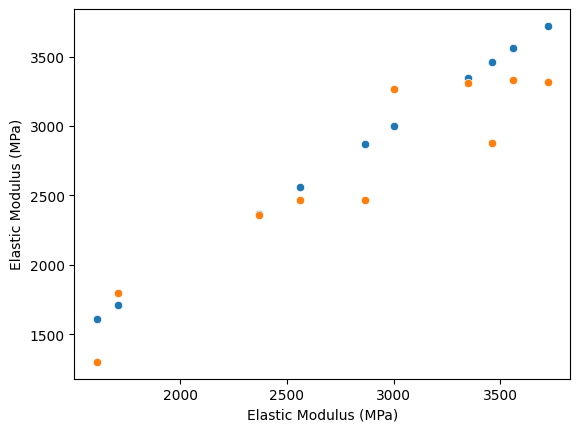

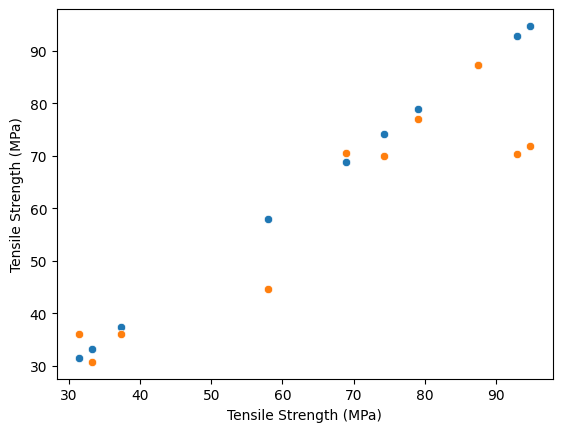

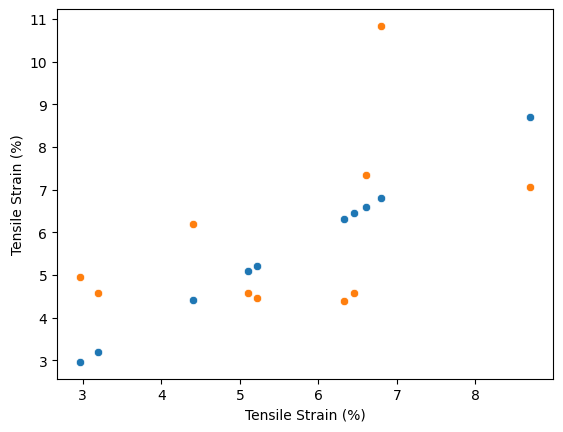

In [ ]:
for colonna in pred_properties_clean_df:
  fix,ax=plt.subplots()
  sns.scatterplot(x=y_test[colonna],y=y_test[colonna], ax=ax)
  sns.scatterplot(x=y_test[colonna],y=pred_properties_clean_df[colonna], ax=ax)

In [42]:
mask_abs_gnp=(X_test["Polymer Matrix_ABS"]==1) & (X_test["Filler_GNP"]==1)

In [43]:
X_test_abs_gnp=X_test[mask_abs_gnp]
y_test_abs_gnp=y_test.loc[mask_abs_gnp]

In [44]:
y_pred_abs_gnp=model.predict(X_test_abs_gnp)

In [45]:
mae=mean_absolute_error(y_test_abs_gnp,y_pred_abs_gnp)
rmse=np.sqrt(mean_squared_error(y_test_abs_gnp,y_pred_abs_gnp))
r2=r2_score(y_test_abs_gnp,y_pred_abs_gnp)
print("Valutazione SOLO su ABS+GNP:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Valutazione SOLO su ABS+GNP:
MAE: 43.33108611171261
RMSE: 114.8860267239872
R2: -0.22458938202784193
